# Prognozowanie cen nieruchomości w Kalifornii 

## Autorzy:
##### Jakub Załuska 217319
##### Patryk Welkier 217409
##### Kuba Zalewski 217300
##### Karolina Trzaskulska 217485
  

In [1]:
# Importujemy biblioteki potrzebne do analizy danych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Streszczenie:

W naszym projekcie metodą regresji liniowej postaraliśmy się oszacować jaki jest koszt zakupu mieszkania w Kaliforni. Do przeprowadzenia tej analizy posłużyliśmy się takimi parametrami (dotyczących dystryktów) jak długość geograficzna, szerokośś geograficzna, średni wiek budynku, ilość pokoi, ilość sypialni, populacja, ilość gospodarstw domowych, średnie przychody, odleglość od oceanu. Każda z tych cech w mniejszy lub wiekszym stopniu wpływa na cenę mieszkań w tym pięknym miejscu, co udało nam się pokazać w naszej pracy.


# Słowa kluczowe
* Regresja liniowa
* p-value
* Współczynik determinancji(R^2)
* Średni błąd kwadratowy
* Średni błąd procentowy absolutny

# Założenia regresji liniowej:

* liniowa zależność - zależność liniowej relacji między zmienną wyjaśniającą, a zmienną wyjaśniną
* homoskedastyczność - występowania stałej wariancji reszt dla poszczególnych wartości zmiennej niezależnej, co sprowadza sie do tego, że dla poszczególnych wartości / przedziałów wartości przewidywujących rozproszenie błędów jest podobne 
* brak wspóliniowości predyktów - brak silnej korelacji między zmiennymi objaśniającymi (ponieważ w przeciwnym przypadku najczęściej jeden z nich jest okazuję się nie istotny)
* liczba obserwacji musi być większa bądź równa liczbie parametrów wyprowadzonych z analizy regresji - warunek ten jest niezbędny do wyliczenia współczynników regresji, im wiecej mamy obserwacji tym z większą precyzja możemy oszacować parametr 
* brak wystąpienia autokorelacji reszt, składnika losowego - błędy przewidywania rzeczywistej wartości zmiennej zależnej na podstawie utworzonego przez nas modelu regresji są niezależne od siebie
* reszty mają rozkład zbliżony do rozkładu normalnego - składnik losowy ma rozkład zbliżony do rozkładu normalnego N(0,σ)
* analiza regresji nie powinna być ekstrapolowana - wyliczony model regresji, który został opracowany dla danego zakresu danych nie powinien być ekstrapolowany na dane spoza zakresu, na którym został zbudowany


# Regresja liniowa i interpretowalność wyników
Regresja liniowa generuje funkcje liniowe, dlatego nie jest tak "elastyczna" jak inne modele statystyczne, jednak zapewnia kompromis pomiędzy interpretowalnością wyników, a precyzją modelu. 
Wykres poniżej, zaczęrpnięty z książki "An Introduction to Statistical Learning", przedstawia zależność elastyczności różnych modeli statystycznych i ich interpretowalności.

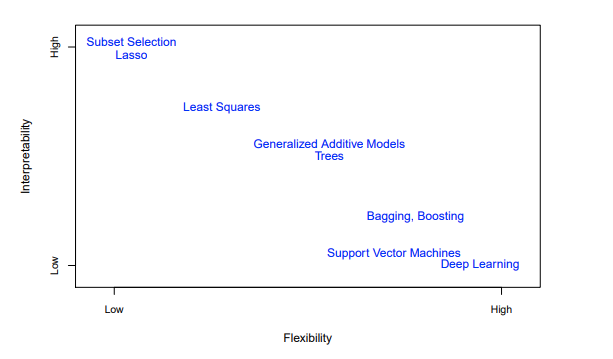

# Wzory matematyczne

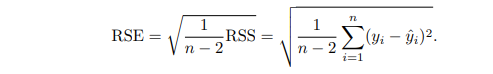
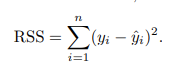
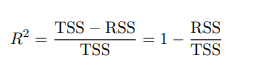




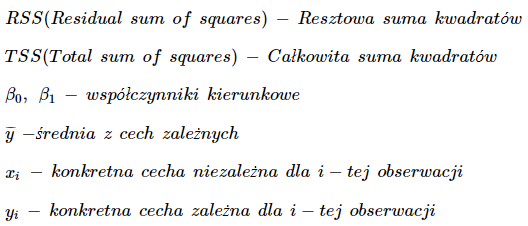

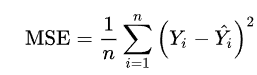
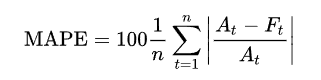

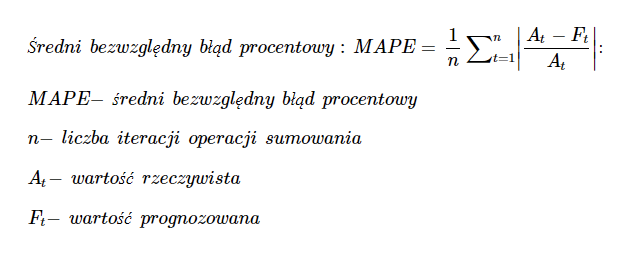

# Zmienne:

* longitude - długość geograficzna dystryktów
* latitude - szerokość geograficzna dystryktów
* housing_median_age - średni wiek budynków mieszkalnych w danym obszarze
* total_rooms - ilość pokoi w danym obszarze
* total_bedrooms - ilość sypialni mieszczących się w danym obszarze	
* population - populacja w danym dystrykcie
* households - ilość gospodarstw domowych w danym dystrykcie
* median_income - średnie przychody w danym obszarze	
* median_house_value -średnia wartość domów w danym obszarze
* ocean_proximity - określenie czy dany obszar znajduję sie daleko od oceanu
* room_household_ratio - stosunek liczby pokoi do liczby gospodarstw domowych 
* population_household_ratio - stosunek liczby ludności do liczby gospodarstw domowych (wskaźnik demograficzny)

In [2]:
# Wczytujemy dane z pliku csv
data = pd.read_csv('housing.csv')
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# Analiza danych 
 Dane zostały łącznie pobrane z 20640 dysktryktów w Kalifornii, przy czym brakuje danych o ilości sypialni w 207 dystryktach, które zostały uzupełnione dominantą. Do transformacji danych użyta została standaryzacja. 

 Odchylenie standardowe jest duże w przypadku median wieku gospodarstw domowych, liczby pokoi, liczby sypialni, liczby gospodarstw domowych, median zarobków i median wartości domów w dystrykcie. Oznacza to, że te dane będą znacząco rozproszone. W przypadku współrzędnych geograficznych odchylenie standardowe jest bardzo niskie, ze względu na to, że wszystkie dystrykty znajdują się w tym samym stanie, w stanie Kalifornia.  

 W przypadku liczby pokoi, liczby sypialni, populacji, liczby gospodarstw odmowych, median zarobków i median wartości domu w dystryktach mediany tych wartości są niższe od ich wartości średnich, co oznacza, że dużo danych jest znacząco odstających od ich wartości średniej. W przypadku współrzędnych geograficznych i median wieku gospodarstwa domowego różnica jest niewielka i dane nie powinny znacząco odstawać od średniej. 

 W głębi lądu znajduję się 6551(31,74%) dystryktów. Najwięcej, bo w odległości mniejszej niż 1 godzina od oceanu, znajduję się 9136(44,26%) dystryktów. W pobliżu oceanu znajduję się 2658(12,88%) dystryktów, a w pobliżu zatoki 2290(11,1%) dystryktów. Najmniej, czyli tylko 5(0,02%) dystryktów znajduję się na wyspie. 

In [3]:
# Sprawdzamy wymiar danych
data.shape

(20640, 10)

In [4]:
# Wyświetlamy podsumowanie informacji o danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Liczymy wystapienia unikalnych wartości w kolumnie "ocean_proximity"
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Obliczamy i wyświetlamy procentowy udział brakujących wartości w kaśdej kolumnie
for col in data.columns :
    missingSum = data[col].isnull().sum()
    pr = (missingSum/data.shape[0]) *100
    print("{} : {} ({}%)".format(col, missingSum, round(pr, 2)))

longitude : 0 (0.0%)
latitude : 0 (0.0%)
housing_median_age : 0 (0.0%)
total_rooms : 0 (0.0%)
total_bedrooms : 207 (1.0%)
population : 0 (0.0%)
households : 0 (0.0%)
median_income : 0 (0.0%)
median_house_value : 0 (0.0%)
ocean_proximity : 0 (0.0%)


In [7]:
# Przetwarzamy kolumne "ocean_proximity" na kodowanie one-hot
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
data_1hot = enc.fit_transform(data[["ocean_proximity"]])
data_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

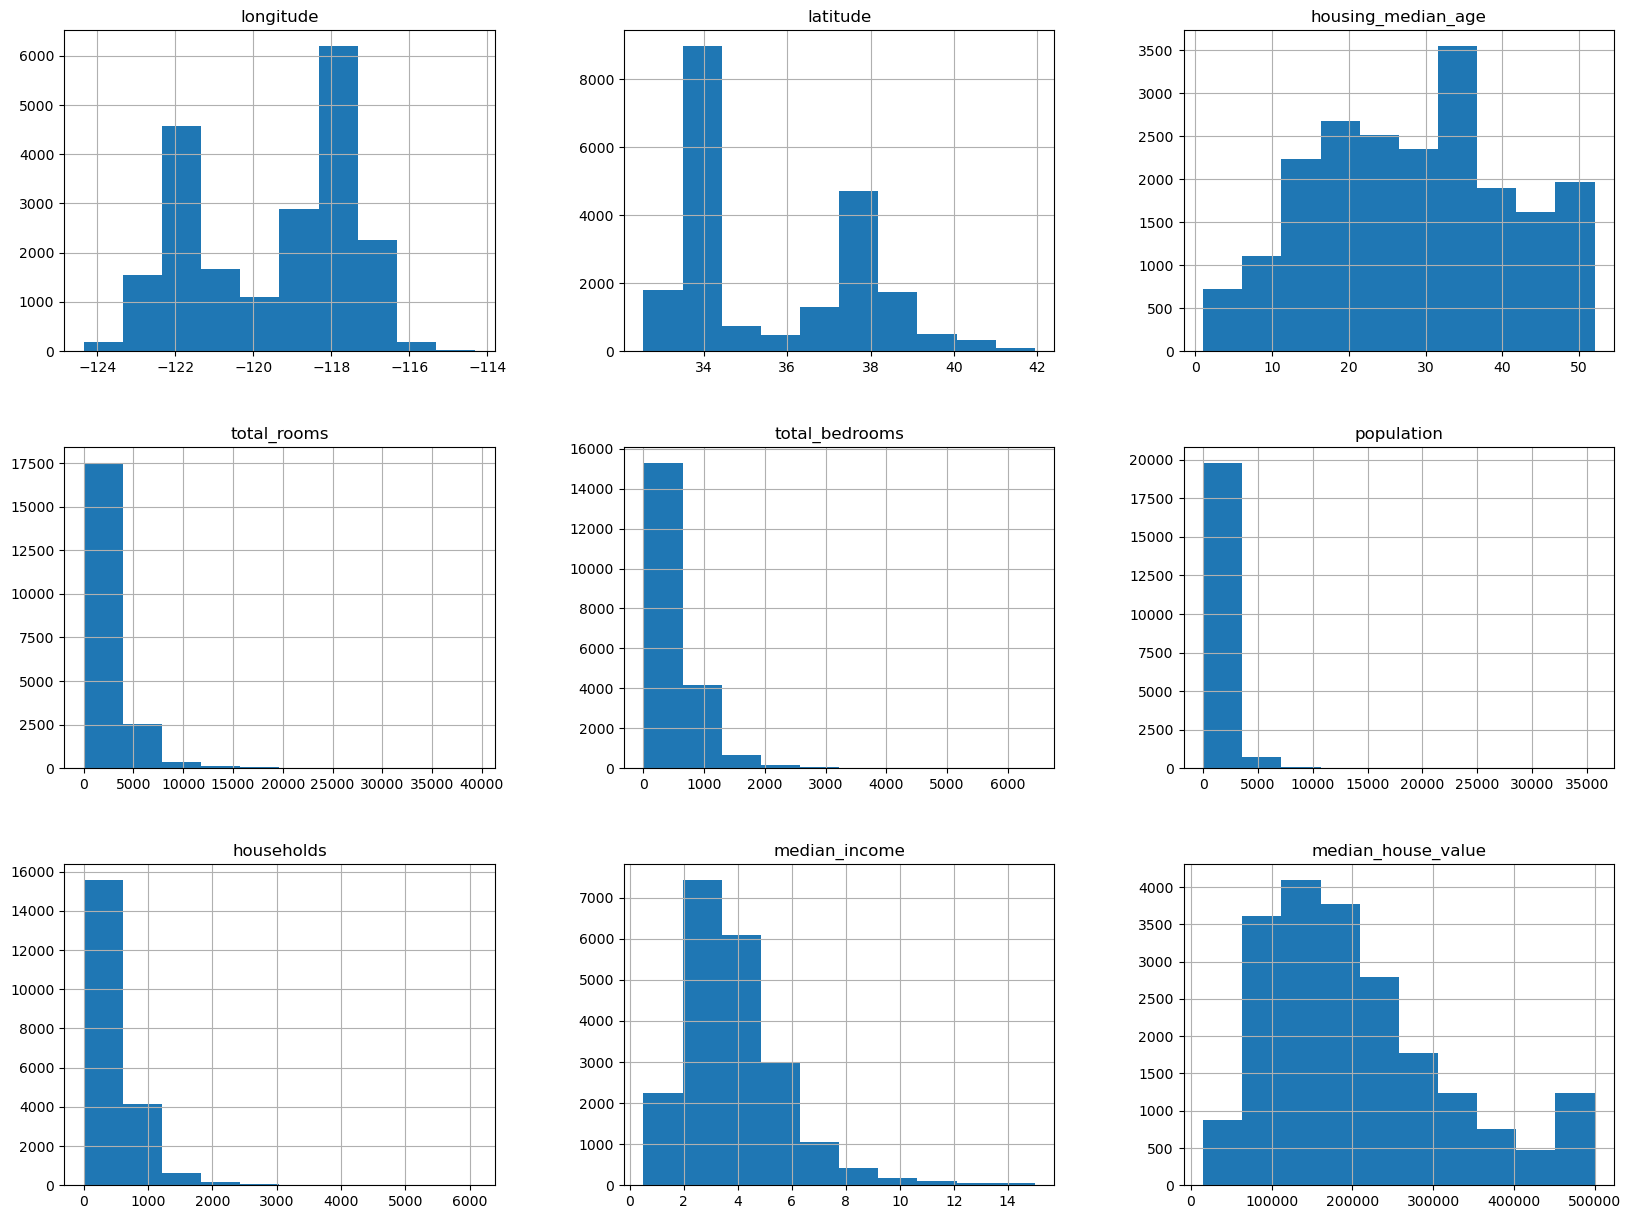

In [8]:
# Tworzymy histogramy dla wszystkich kolumn
data.hist(figsize = (20,15))

# Korelacje
Liczba gospodarstw domowych, pokoi, sypialni i populacji jest ze sobą ściśle powiązana. Im większa liczba gospodarstw domowych, tym większa będzie liczba pokoi, sypialni i tym samym większa populacja w dystrykcie. Większa mediana wieku gospodarstw w dystrykcie oznacza mniejszą liczbę pokoi, sypialni i populację w tym dystrykcie.

In [9]:
# Generujemy podsumowanie statystyczne dla danych
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

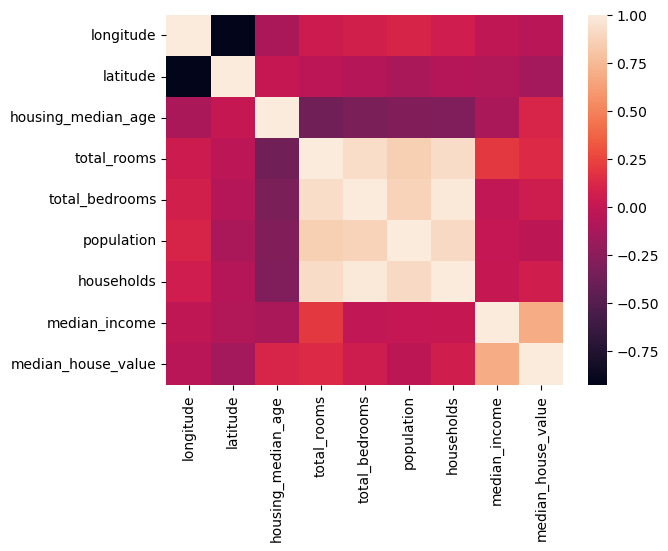

In [10]:
# Tworzymy wykres heatmapy korelacji miedzy kolumnami numerycznymi
import seaborn as sns
sns.heatmap(data.corr(numeric_only= True))

# Tworzenie zbioru testowego
Ważnym elementem tworzenia modelu statystycznego jest możliwość jego późniejszej ewaluacji. Dlatego niezbędne jest utworzenie zbioru testowego, który będzie miał podobny rozkład danych co zbiór treningowy. Dzięki temu, będziemy mogli dokładnie ocenić wydajność naszego modelu, nie pomijając części przypadków. 

In [11]:
# Dzielimy dane na zbiór treningowy (20%) i testowy (80%)
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

<Axes: >

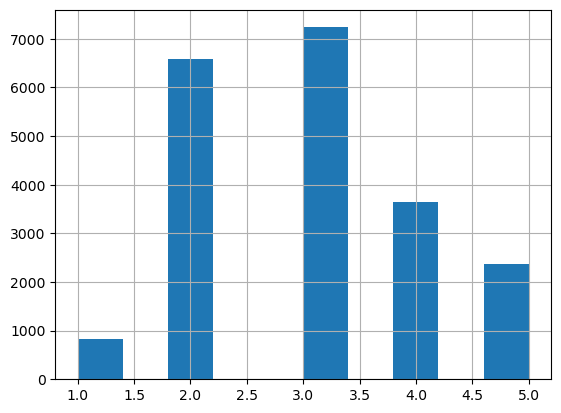

In [12]:
# Tworzymy kolumne "income_c" w zbiorze treningowym i testowym, ktora zawiera zaklasyfikowane wartosci z kolumny "median_income"
# na podstawie przedzialow: [0, 1.5), [1.5, 3.0), [3.0, 4.5), [4.5, 6.0), [6.0, inf) i wyświetlamy histogram kolumny "income_c"
data["income_c"] = pd.cut(data["median_income"],
 bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
 labels=[1, 2, 3, 4, 5])
data_test["income_c"] = pd.cut(data_test["median_income"],
 bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
 labels=[1, 2, 3, 4, 5])
data["income_c"].hist()

In [13]:
# Dzielimy dane na zbiory treningowy i testowy z zachowaniem proporcji dla zmiennej "income_c",
# aby zarowno zbior treningowy jak i testowy mialy podobny rozklad danych
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(data, data["income_c"]):
    train_sss_set = data.iloc[train_index]
    test_sss_set = data.iloc[test_index]
test_sss_set["income_c"].value_counts()/test_sss_set.shape[0]

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_c, dtype: float64

In [14]:
# Obliczamy udziały poszczególnych kategorii zmiennej "income_c" w zbiorze treningowym,
# normalizujac liczbe wystapień przez liczbe wszystkich danych
data["income_c"].value_counts()/data.shape[0]

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_c, dtype: float64

In [15]:
# Obliczamy udziały poszczególnych kategorii zmiennej "income_c" w zbiorze testowym,
# normalizujac liczbe wystapień przez liczbe wszystkich danych testowych.
data_test["income_c"].value_counts()/data_test.shape[0]

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_c, dtype: float64

In [16]:
# Usuwamy kolumne "income_c"
train_sss_set = train_sss_set.copy()
test_sss_set = test_sss_set.copy()
train_sss_set.drop("income_c", axis = 1,inplace=True)
test_sss_set.drop("income_c", axis = 1, inplace=True)
data.drop("income_c", axis=1, inplace=True)
train_sss_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [17]:
# Tworzymy nowy zbiór danych, który zawiera jednynie dane numeryczne.
# Nie zawiera kolumn "ocean_proximity" ani "median_house_value"
data_num = data.drop("ocean_proximity", axis=1)
data_num.drop("median_house_value", axis = 1, inplace = True)
data_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


# Efekt interakcji
W trakcie przetwarzania danych, które będą wykorzystywane w regresji liniowej, ważne jest, aby wziąć pod uwagę efekt interakcji (określany w marketingu  jako efekt synergii).
> The standard linear regression model provides interpretable results
and works quite well on many real-world problems. However, it makes several highly restrictive assumptions that are often violated in practice. Two
of the most important assumptions state that the relationship between the
predictors and response are additive and linear. The additivity assumption means that the association between a predictor Xj and the response Y does
not depend on the values of the other predictors.

In [18]:
# Stworzenie transformatora danych, który dodaje kolumny takie jak "room_household_ratio", "population_household_ratio", 
# czy "bedroom_room_ratio" w zależnosci od podanych parametrów true/false

from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    data.columns.get_loc(c) for c in col_names]


class XAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedroom_room_ratio=True, add_population_household_ratio=True, add_room_household_ratio=True):
        self.add_bedroom_room_ratio = add_bedroom_room_ratio
        self.add_room_household_ratio = add_room_household_ratio
        self.add_population_household_ratio = add_population_household_ratio
    
    def fit(self, X, y=None):
        return self 
    
    def transform(self, X, y=None):
        if self.add_room_household_ratio:
            add_room_household_ratio = X[:, rooms_ix] / X[:, households_ix]
            X = np.concatenate((X, add_room_household_ratio.reshape(-1, 1)), axis=1)
        if self.add_population_household_ratio:
            add_population_household_ratio = X[:, population_ix] / X[:, households_ix]
            X = np.concatenate((X, add_population_household_ratio.reshape(-1, 1)), axis=1)
        if self.add_bedroom_room_ratio:
            add_bedroom_room_ratio = X[:, bedrooms_ix] / X[:, rooms_ix]
            X = np.concatenate((X, add_bedroom_room_ratio.reshape(-1, 1)), axis=1)
        return X


In [19]:
# Dodajemy te cechy jako kolumny do zbioru danych
adder = XAdder(True, True, False)
data_added = adder.transform(data.values)
data_added = pd.DataFrame(
    data_added,
    columns=list(data.columns)+["room_household_ratio", "population_household_ratio"],
    index=data.index)
data_added

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_household_ratio,population_household_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,2.80226,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.123209,0.219892


In [20]:
# Tworzymy pipeline dla danych numerycznych. Najpierw uzupełniamy brakujace
# wartosci najczesciej wystepującymi wartościami. Nastepnie dodajemy nowe 
# cechy numeryczne a na koniec wszystko standaryzujemy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
pipeline_num = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("x_adder", XAdder()),
    ("std_scaler", StandardScaler())
])

In [21]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [22]:
# OneHotEncoding kolumny "ocean_proximity"
data_1hot_df = pd.DataFrame.sparse.from_spmatrix(data_1hot)
data_col = data.join(data_1hot_df)
data_col.drop("ocean_proximity", inplace=True, axis = 1)
data_col = pd.get_dummies(data.astype(str),dtype=int,columns=['ocean_proximity'], prefix='', prefix_sep='')
data_col

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [23]:
# Przygotowanie zbioru treningowego
train_sss_x = train_sss_set.drop("median_house_value", axis = 1)
train_sss_y = train_sss_set["median_house_value"]
train_x = train_sss_x.copy()
train_sss_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [24]:
# Stworzenie Pipeline-u do transformacji danych, z podziałem na dane numeryczne i kategoryczne
from sklearn.compose import ColumnTransformer

x_num = list(data_num)
x_c = ["ocean_proximity"]

self_pipeline = ColumnTransformer([
 ("num", pipeline_num, x_num),
 ("c", OneHotEncoder(handle_unknown='ignore'), x_c)
 ])
train_sss_pipe = self_pipeline.fit_transform(train_sss_x)
train_prepared = self_pipeline.fit_transform(train_x)

In [25]:
# Transformacja danych za pomocą pipeline-u
pipe_test_x = data.drop("median_house_value", axis = 1).iloc[:10]
pipe_test_lab = data["median_house_value"].iloc[:10]
pipe_test_x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,NEAR BAY


In [26]:
pipe_test_lab

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [27]:
pipe_test_done = self_pipeline.transform(pipe_test_x)
pipe_test_done


array([[-1.32601053,  1.04807876,  0.98188059, -0.81489835, -0.98038268,
        -0.98391771, -0.98756146,  2.33575472,  0.59109781, -0.04669298,
        -1.09513013,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.32101494,  1.03872378, -0.60864777,  2.09341564,  1.3940263 ,
         0.8796046 ,  1.70618621,  2.32326045,  0.30545488, -0.08516808,
        -0.94248046,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.33100611,  1.03404629,  1.85667119, -0.54038793, -0.83213402,
        -0.82795192, -0.85180935,  1.77519237,  1.09040865, -0.02539687,
        -1.37826793,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.3360017 ,  1.03404629,  1.85667119, -0.63064434, -0.72277024,
        -0.7723779 , -0.7400135 ,  0.92773422,  0.1443342 , -0.04734993,
        -0.46720706,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [-1.3360017 ,  1.03404629,  1

In [28]:
# Sprawdzenie regresji liniowej
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(train_sss_pipe, train_sss_y)
prediction_test_10 = regressor.predict(pipe_test_done)
prediction_test_10

array([405058.84159058, 435450.54953962, 375673.97225517, 318988.44009664,
       251119.54169171, 264234.90616108, 256699.03970531, 256199.40945655,
       201506.87300071, 267666.14068114])

In [29]:
pipe_test_lab

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
7    241400.0
8    226700.0
9    261100.0
Name: median_house_value, dtype: float64

In [30]:
# Obliczenie RMSE i MAPE na zbiorze treningowym
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
predictions = regressor.predict(train_sss_pipe)
mse = mean_squared_error(train_sss_y, predictions, squared=False)
print(f"RMSE: {round(mse,3)}")
mape = mean_absolute_percentage_error(y_true=train_sss_y, y_pred=predictions)
print(f"MAPE: {round(mape,3)}")

MSE: 68434.686
MAPE: 0.284


# Ocena modelu
Obliczone poniżej parametry pozwalają na oszacowanie wydajności modelu. Wynika z nich, że największy wpływ na wartość domu ma cecha niezależna x14, czyli liczba pokoi przypadająca na jeden dom. Parametr p-value jest bardzo mały, co sugeruje, że model jest znaczący. Parametr R^2, który przedstawia proporcję wariancji zmiennej zależnej, która jest wyjaśniana przez model regresji w stosunku do całkowitej zmienności tej zmiennej, wynosi 65%. Wartość t-studenta dla cech niezależnych przyjmuje wartości z zakresu 0,030 do 233,544. Minimalną wartość przyjmuje dla parametru x5, czyli liczby sypialni, wynoszącą 0,030. Ponieważ wykorzystujemy tę cechę niezależną jako "interaction term", nie usuwamy jej z modelu.  Poniższy cytat z książki "An Introduction to Statistical Learning" uzasadnia to rozumowanie. Wszystkie pozostałe parametry uznajemy za znaczące.

>However, it is sometimes the case that an interaction term has a very small p-value, but
the associated main efects do not. The hierarchical principle states that if we include an interaction in a model, we should also include the main efects, even if the p-values associated with their coefcients are not signifcant. In other words, if the interaction between X1 and X2 seems important, then we should include both X1 and X2 in the model even if their coefcient estimates have large p-values. The rationale for this principle is that if X1 × X2 is related to the response,
then whether or not the coefcients of X1 or X2 are exactly zero is of little interest. Also X1 × X2 is typically correlated with X1 and X2, and so
leaving them out tends to alter the meaning of the interaction.

In [31]:
# Obliczenie parametrów regresji liniowej
import statsmodels.api as sm

result = sm.OLS(train_sss_y, train_sss_pipe).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     2044.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:22:48   Log-Likelihood:            -2.0727e+05
No. Observations:               16512   AIC:                         4.146e+05
Df Residuals:                   16496   BIC:                         4.147e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -5.558e+04   2285.708    -24.314      0.000   -6.01e+04   -5.11e+04
x2         -5.646e+04   2408.190    -23.446      0.000   -6.12e+04   -5.17e+04
x3          1.377e+04    614.710     22.399      0.000    1.26e+04     1.5e+04
x4          3821.3818   2235.343      1.710      0.087    -560.132    8202.896
x5            92.5089   3103.096      0.030      0.976   -5989.894    6174.912
x6         -4.622e+04   1368.819    -33.765      0.000   -4.89e+04   -4.35e+04
x7          4.747e+04   3040.346     15.613      0.000    4.15e+04    5.34e+04
x8          7.614e+04    766.356     99.354      0.000    7.46e+04    7.76e+04
x9          7170.8603    673.041     10.654      0.000    5851.628    8490.093
x10         1016.4354    551.518      1.843      0.065     -64.599    2097.470
x11         1.313e+04    858.735     15.295      0.000    1.15e+04    1.48e+04
x12         2.185e+05    935.746    233.544      0.000    2.17e+05     2.2e+05
x13         1.825e+05   1416.244    128.865      0.000     1.8e+05    1.85e+05
x14         3.449e+05   4.84e+04      7.121      0.000     2.5e+05     4.4e+05
x15          2.14e+05   1911.254    111.956      0.000     2.1e+05    2.18e+05
x16          2.22e+05   1662.794    133.510      0.000    2.19e+05    2.25e+05
==============================================================================
Omnibus:                     4253.732   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20784.115
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       7.978   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Użycie GridSearchCV do optymalizacji hyper-parametrów
from sklearn.model_selection import GridSearchCV
param_grid = {
    'columntransformer__add_bedroom_room_ratio': [True, False],
    'columntransformer__add_population_household_ratio': [True, False],
    'columntransformer__add_room_household_ratio': [True, False]
}
grid_search = GridSearchCV(
    estimator=Pipeline([
        ("columntransformer",XAdder() ),
        ("linear_regression", LinearRegression())
    ]),
    param_grid=param_grid,
    cv=5,  
    scoring='neg_mean_squared_error', 
    verbose=2,  
    n_jobs=-1  
)

In [33]:
grid_search.fit(train_prepared, train_sss_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer', XAdder()),
                                       ('linear_regression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'columntransformer__add_bedroom_room_ratio': [True,
                                                                       False],
                         'columntransformer__add_population_household_ratio': [True,
                                                                               False],
                         'columntransformer__add_room_household_ratio': [True,
                                                                         False]},
             scoring='neg_mean_squared_error', verbose=2)

In [34]:
# Uzyskanie najlepszego estymatora, z ustawionymi hyper-parametrami
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 XAdder(add_population_household_ratio=False,
                        add_room_household_ratio=False)),
                ('linear_regression', LinearRegression())])

In [35]:
grid_search.best_params_

{'columntransformer__add_bedroom_room_ratio': True,
 'columntransformer__add_population_household_ratio': False,
 'columntransformer__add_room_household_ratio': False}

In [36]:
test_sss_x = test_sss_set.drop("median_house_value", axis = 1)
prepared_test = self_pipeline.fit_transform(test_sss_x)
test_sss_y = test_sss_set["median_house_value"]
model = grid_search.best_estimator_
predictions_grid_test = model.predict(prepared_test)
predictions_grid_test

array([429152.59802838, 293022.70394821, 242991.3458457 , ...,
       308710.08183173, 267386.73633412, 238863.78795753])

In [45]:
# Obliczenie błędów RMSE i MAPE na zbiorze testowym
mse_grid_test = mean_squared_error(test_sss_y, predictions_grid_test, squared=False)
print(f"RMSE: {round(mse_grid_test,3)}")
mape_test = mean_absolute_percentage_error(y_true=test_sss_y, y_pred=predictions_grid_test)
print(f"MAPE: {round(mape_test,3)}")

RMSE: 66954.246
MAPE: 0.291


In [46]:
# Przetestowanie modelu RandomForestRegressor i obliczenie błędów na zbiorze testowym w celu porównania do regresji liniowej
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 42)
regressor.fit(train_prepared, train_sss_y)
RGR_test = regressor.predict(prepared_test)
mse = mean_squared_error(test_sss_y, RGR_test, squared=False)
print(f"RMSE: {round(mse,3)}")
mape = mean_absolute_percentage_error(y_true=test_sss_y, y_pred=RGR_test)
print(f"MAPE: {round(mape,3)}")

RMSE: 79210.63
MAPE: 0.346


In [47]:
# Obliczenie błędów na zbiorze treningowym w celu porównania do regresji liniowej
predicted_train = regressor.predict(train_prepared)
mse = mean_squared_error(train_sss_y, predicted_train, squared=False)
print(f"RMSE: {round(mse,3)}")
mape = mean_absolute_percentage_error(y_true=train_sss_y, y_pred=predicted_train)
print(f"MAPE: {round(mape,3)}")

RMSE: 18649.484
MAPE: 0.067


# Cytowania
 Wzory do obliczania Root Mean Squared Error (RSE), Residual Sum of Squares (RSS), współczynnika determinacji (R^2), wykres porównujący modele oraz metody do poprawienia wydajności modelu statystycznego zostały zaczerpnięte z książki "An Introduction to Statistical Learning" autorstwa Gareth James, Daniela Witten, Trevor Hastie i Rob Tibshirani. Książka ta jest uznawanym źródłem w dziedzinie nauki statystycznej i uczenia maszynowego, dostarczając zarówno teoretycznych podstaw, jak i praktycznych przykładów zastosowań. 
 
"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems" autorstwa Aurelien'a Geron'a dostarczyła niezbędnych informacji o przetwarzaniu danych przed użyciem ich w algorytmach oraz wiedzy jak ocenić wydajność stworzonego modelu.

# Bibliografia
<ol>
    <li>
        Bhagat, N., Mohokar, A., & Mane, S. (2016). House Price Forecasting using Data Mining. International Journal of Computer Applications, 152(2),
        23–26.
    </li>
    <li>
       M. Bhuiyan and M. A. Hasan, ”Waiting to Be Sold: Prediction of TimeDependent House Selling Probability,” 2016 IEEE International Conference on Data Science and Advanced Analytics (DSAA), Montreal, QC,
2016, pp. 468-477, doi: 10.1109/DSAA.2016.58.
    </li>
    <li>
        "An Introduction to Statistical Learning" Gareth James, Daniela Witten, Trevor Hastie i Rob Tibshirani 2021
    </li>
    <li>
        "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems" Aurelien  Geron 2020
    </li>
</ol>


..

# Podsumowanie
Nasz projekt badawczy skupiał się na wykorzystaniu regresji liniowej do oszacowania cen mieszkań w Kalifornii, biorąc pod uwagę różnorodne parametry dystryktów. Analiza opierała się na modelu regresji liniowej, w którym badaliśmy zależność między takimi czynnikami jak długość i szerokość geograficzna, wiek budynków, liczba pokoi i sypialni, populacja, dochody oraz odległość od oceanu, a ceną nieruchomości. Wyniki naszej analizy wykazały, że każda z tych cech miała istotny wpływ na cenę mieszkań w Kalifornii.

Dodatkowo, po przeprowadzeniu analizy regresji liniowej, zastosowaliśmy technikę GridSearchCV w celu optymalizacji modelu. Wyniki tego procesu wskazały na znaczną poprawę modelu.

Przed zastosowaniem techniki GridSearchCV wartości błędów wynosiły:

* Średni błąd kwadratowy (RMSE): 68434.686
* Średni błąd procentowy absolutny (MAPE):0.284

Po zaimplementowaniu GridSearchCV, otrzymaliśmy następujące wartości błędów:

* Średni błąd kwadratowy (RMSE): 66954.24
* Średni błąd procentowy absolutny (MAPE): 0.291

Wynika z tego, że dzięki optymalizacji udało nam się zmniejszyć wartość MSE o 1481.44, ale jednocześnie zwiększyła się wartość MAPE o 0.007.

Ponieważ RandomForestRegressor jest modelem bardziej elastycznym, co wynika z wykresu przedstawiajacego zależność elastyczności modelu od interpretowalności wyników, model lepiej radzi sobie na danych treningowych, jednak ma problemy z generalizacją nowych przypadków. Potwierdzają to małe błedy MAPE oraz MSE uzyskane na zbiorze treningowym:

* Średni błąd kwadratowy (RMSE): 18649.484
* Średni błąd procentowy absolutny (MAPE): 0.067
  
 oraz duże błędy uzyskane na zbiorze testowym:

* Średni błąd kwadratowy (RMSE): 79210.63
* Średni błąd procentowy absolutny (MAPE): 0.346

Uzyskane błedy świadczą, że regresja liniowa, pomimo wiekszęgo błędu na zbiorze treningowym, lepiej generalizuje nowe przypadki i lepiej sprawdzi się w naszym badaniu. Warto zauważyć, że po zaimplementowaniu GridSearchCV, którego zadaniem jest znalezienie najlepszych parametrów do modelu, błąd MSE zmniejszył się o 1481.44, a błąd MAPE zwiększył się o 0.007. Może to wynikać z faktu, że nasz zbiór testowy minimalnie różni się od zbioru treningowego i przechowuje proporcjonalnie mniej domów o dużej wartości, więc błąd procentowy będzie większy, pomimo zmniejszenia MSE.



Ostateczne błędy mogą wynikać z różnych czynników, takich jak nieliniowe zależności między zmiennymi, czy też braku uwzględnienia istotnych predyktorów.  Dlatego też, dalsza analiza i doskonalenie modelu mogą być konieczne w celu uzyskania bardziej precyzyjnych prognoz cen mieszkań w Kalifornii.